In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Libraries

In [3]:
# Imports

# For Data Processing And Evaluation
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# For ML Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator,img_to_array
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import layers
from keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Miscellaneous
import os
import shutil
import random
import pickle

# Suppress future, deprecation, and SettingWithCopy warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

# make all columns in a df viewable and wider
pd.options.display.max_columns = None
pd.options.display.width = None
pd.set_option('max_colwidth', 400)

### Defineing **Three Classes**


In [4]:
# Define the data directory
datadir = '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset'
Categories = ['Benign cases', 'Malignant cases', 'Normal cases']




In [5]:
flat_data_arr = []
target_arr = []
for category in Categories:
    for image in os.listdir(os.path.join(datadir, category)):
        image_path = os.path.join(datadir, category, image)
        flat_data_arr.append(image_path)
        target_arr.append(category)

In [7]:
flat_data_arr

['/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (1).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (2).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (3).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (4).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (5).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (6).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (7).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (8).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (9).jpg',
 '/content/drive/My

## Splitting **Training Dataset and Testing Dataset**

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(flat_data_arr, target_arr, test_size=0.2, random_state=42)


In [12]:
x_train

['/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (3).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (7).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (504).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (557).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (235).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (248).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (302).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (473).jpg',
 '/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases

# **Displaying Images**

In [13]:
IMAGE_SIZE = (224, 224)

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays.
    '''
    images = []
    for path in paths:
        print(path)
        image = load_img(path, target_size=IMAGE_SIZE)
        images.append(image)
    return images

/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (26).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (329).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (217).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (401).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (61).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (385).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (93).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (109).jpg
/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (141).jpg
/content/drive/MyDrive

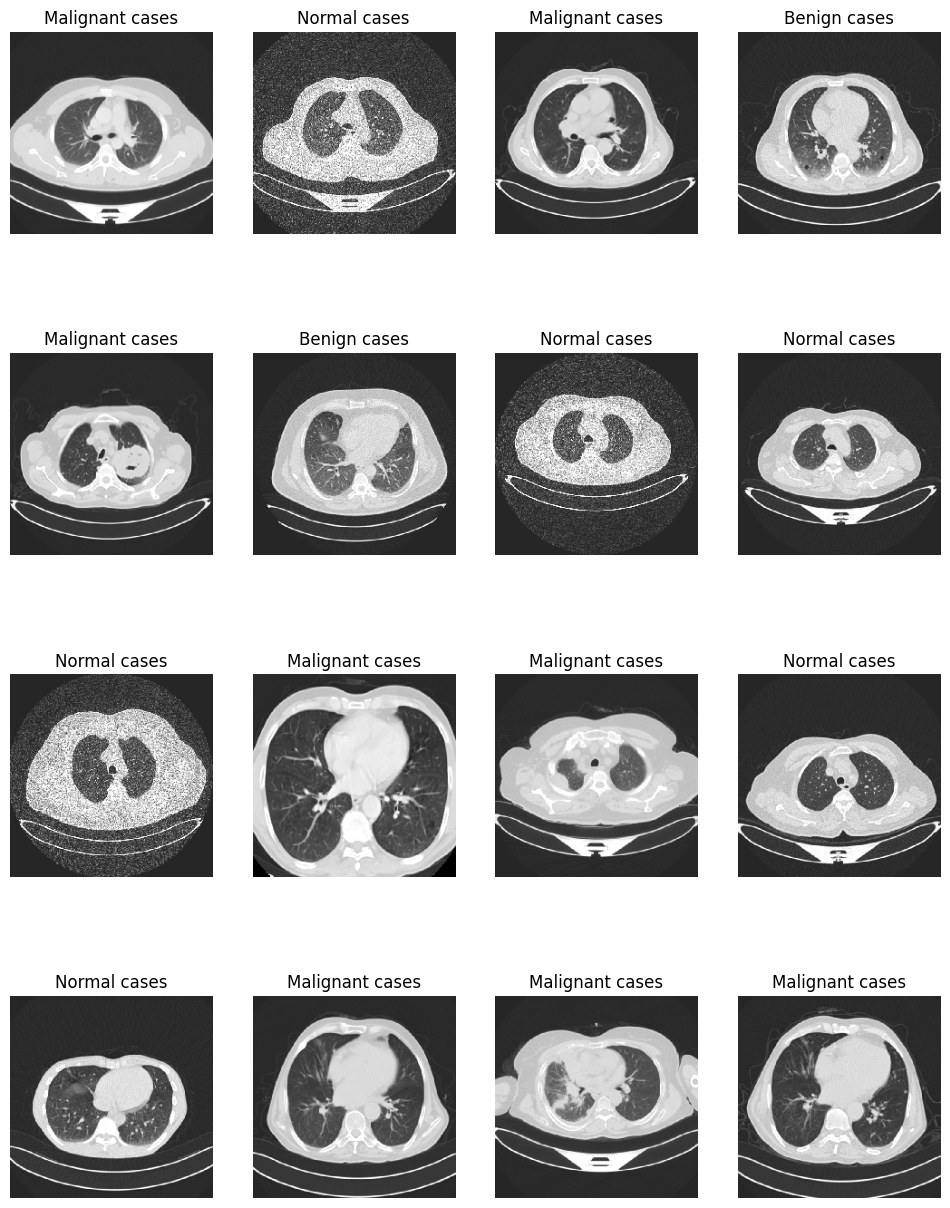

In [14]:
# open 16 images
images = open_images(x_train[50:67])
labels = y_train[50:67]
fig = plt.figure(figsize=(12, 16))
for x in range(1, 17):
    fig.add_subplot(4, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.show()

## Creating **Training Dataframe and Testing Dataframe**

In [15]:
lung_train_df = pd.concat([pd.Series(x_train, name = 'paths'),
                            pd.Series(y_train, name = 'category')],
                            axis = 1)
lung_train_df

,paths,category
0,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (3).jpg,Benign cases
1,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (7).jpg,Benign cases
2,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (504).jpg,Malignant cases
3,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (557).jpg,Malignant cases
4,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (235).jpg,Normal cases
...,...,...
873,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (404).jpg,Malignant cases
874,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (100).jpg,Malignant cases
875,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (411).jpg,Normal cases
876,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (98).jpg,Normal cases


In [16]:
lung_test_df = pd.concat([pd.Series(x_test, name = 'paths'),
                            pd.Series(y_test, name = 'category')],
                            axis = 1)
lung_test_df

,paths,category
0,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (46).jpg,Benign cases
1,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (509).jpg,Malignant cases
2,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Benign cases/Benign case (60).jpg,Benign cases
3,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Malignant cases/Malignant case (538).jpg,Malignant cases
4,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (242).jpg,Normal cases
...,...,...
215,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (161).jpg,Normal cases
216,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (121).jpg,Normal cases
217,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (296).jpg,Normal cases
218,/content/drive/MyDrive/Lung_CTscan_Classifier/data/lung _cancer_dataset/Normal cases/Normal case (343).jpg,Normal cases


## Performing **Exploratory Data Analysis**

In [17]:
lung_train_df['category'].value_counts(normalize = True)

,proportion
category,
Malignant cases,0.511390
Normal cases,0.383827
Benign cases,0.104784


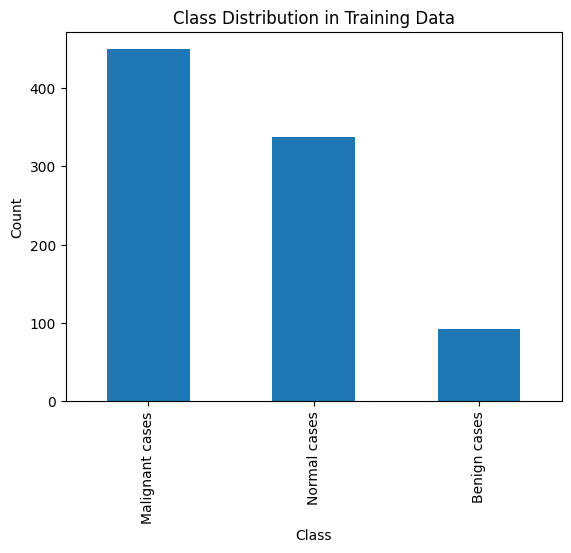

In [ ]:

fig, ax = plt.subplots()

# plot histogram of tumor types
lung_train_df['category'].value_counts().plot(kind = 'bar')

#set title and axis labels
ax.set_title('Class Distribution in Training Data')
ax.set_ylabel('Count')
ax.set_xlabel('Class');

In [ ]:
lung_test_df['category'].value_counts(normalize = True)

,proportion
category,
Malignant cases,0.509091
Normal cases,0.359091
Benign cases,0.131818


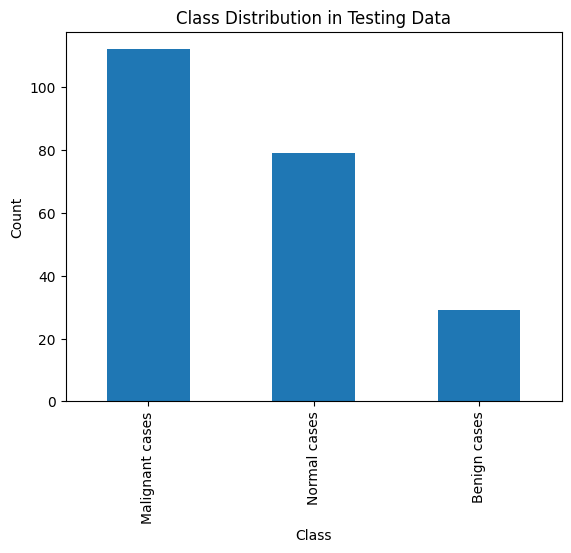

In [ ]:

fig, ax = plt.subplots()

# plot histogram of tumor types
lung_test_df['category'].value_counts().plot(kind = 'bar')

#set title and axis labels
ax.set_title('Class Distribution in Testing Data')
ax.set_ylabel('Count')
ax.set_xlabel('Class');

# Setting **Functions and Hyperparameters**

In [18]:

num_classes = 3

# Loss function, optimizer, and callbacks
cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()

# Image data generators
batch_size = 32
IMAGE_SIZE = (224, 224)


# Applying **Data Augmentation**

In [58]:
num_classes = 3
batch_size = 32
IMAGE_SIZE = (224, 224)
cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()

train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       brightness_range=[0.75, 1.25],
                                       rotation_range = 15)
test_datagen_aug = ImageDataGenerator(rescale=1./255)


train_generator_aug = train_datagen_aug.flow_from_dataframe(
        lung_train_df,
        x_col = 'paths',
        y_col = 'category',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        seed = 1990,
        shuffle = True,
        color_mode='grayscale')

test_generator_aug = test_datagen_aug.flow_from_dataframe(
    dataframe=lung_test_df,
    x_col='paths',
    y_col='category',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode='categorical',
    seed=1990,
    shuffle=False,  # Shuffle should be False for validation data
    color_mode='grayscale')


Found 877 validated image filenames belonging to 3 classes.
Found 220 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="paths". These filename(s) will be ignored.
  warnings.warn(


# **Model 1**

In [59]:
model_conv1 = Sequential()

# define 3x3 filter window sizes and create 64 filters
model_conv1.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(224, 224, 1), padding = 'same'))
model_conv1.add(layers.MaxPooling2D((2, 2)))

model_conv1.add(layers.Flatten())

model_conv1.add(layers.Dense(64, activation='relu'))
model_conv1.add(layers.Dense(3, activation='softmax'))

cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()

model_conv1.compile(optimizer=opt, loss=cce,  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model_conv1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 802816)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │    51,380,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,381,123 (196.00 MB)

 Trainable params: 51,381,123 (196.00 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Fit model
CNN_model1 = model_conv1.fit(
    train_generator_aug,
    verbose=1,
    validation_data=test_generator_aug,
    epochs=10
)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9196 - loss: 0.2634 - val_accuracy: 0.9273 - val_loss: 0.2563
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9001 - loss: 0.2805 - val_accuracy: 0.9091 - val_loss: 0.2393
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9452 - loss: 0.1908 - val_accuracy: 0.8955 - val_loss: 0.2526
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.9311 - loss: 0.1897 - val_accuracy: 0.8364 - val_loss: 0.4220
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9342 - loss: 0.1924 - val_accuracy: 0.9318 - val_loss: 0.2164
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9578 - loss: 0.1426 - val_accuracy: 0.8273 - val_loss: 0.4584
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.9405 - loss: 0.1497 - val_accuracy: 0.8409 - val_loss: 0.4382
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9241 - loss: 0.2349 - val_accuracy: 0.9091 - val_loss:

In [65]:
model_conv1.save('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/model1.h5')

In [70]:
import pickle
pickle.dump(CNN_model1, open('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/model1', 'wb'))

In [72]:
import pickle
model1 = pickle.load(open('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/CNN_model1', 'rb'))

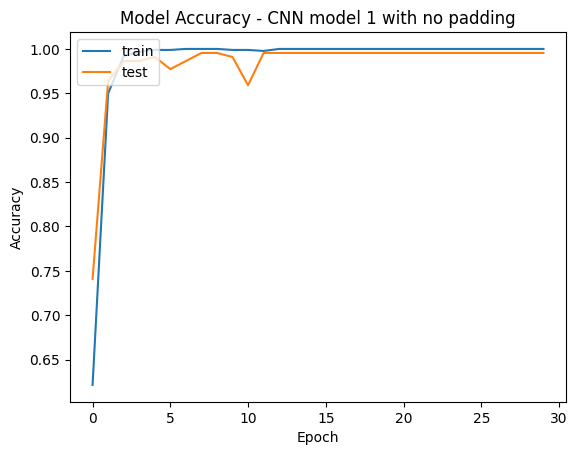

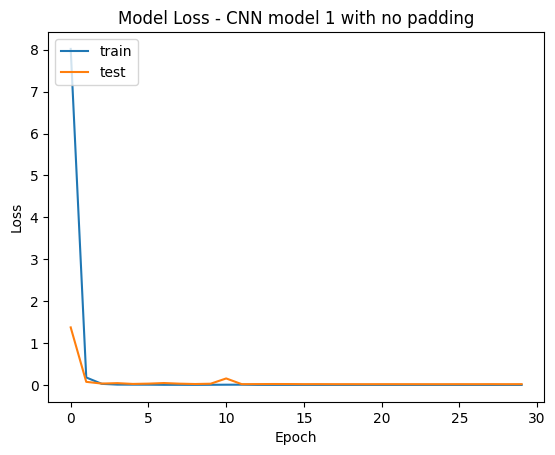

In [78]:
# summarize history for accuracy
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('Model Accuracy - CNN model 1 with no padding')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Loss - CNN model 1 with no padding')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
import pickle
model1P = pickle.load(open('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/CNN_model1_P', 'rb'))

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


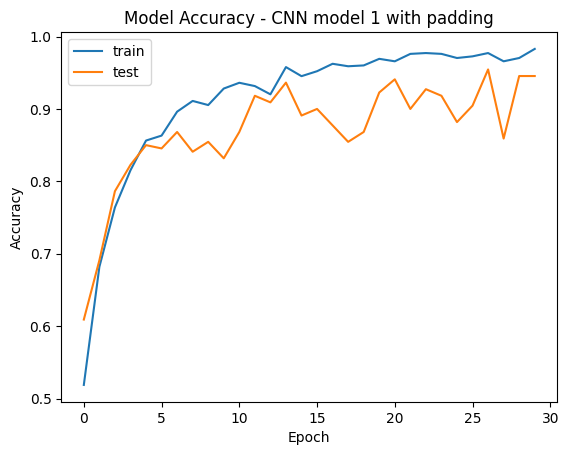

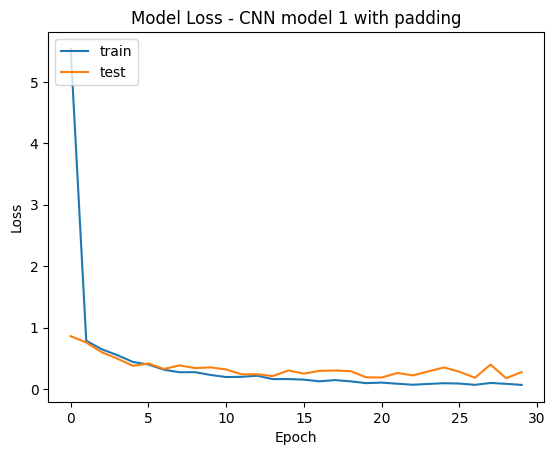

In [79]:
# summarize history for accuracy
plt.plot(model1P.history['accuracy'])
plt.plot(model1P.history['val_accuracy'])
plt.title('Model Accuracy - CNN model 1 with padding')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1P.history['loss'])
plt.plot(model1P.history['val_loss'])
plt.title('Model Loss - CNN model 1 with padding')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
CNN1_h5 = tf.keras.models.load_model('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/model1.h5')

In [68]:
y_pred1 = CNN1_h5.predict(test_generator_aug, batch_size = batch_size)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_true_classes1 = test_generator_aug.classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [32]:
y_pred_classes1

array([1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1])

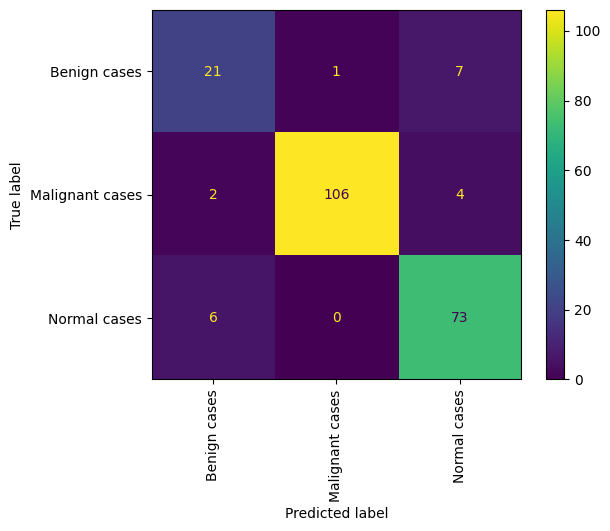

In [69]:

report_labels = ['Benign cases', 'Malignant cases', 'Normal cases']

ConfusionMatrixDisplay.from_predictions(y_true_classes1, y_pred_classes1,
                                        display_labels = report_labels,
                                        xticks_rotation = 90)
                                        #ax = axes[0, 1])

# **Model 2**

In [80]:
#MODEL 2 WITH L2 REGULARIZATION

# specify level of regularization

model_2_L = Sequential()
reg = l2(1e-2)

model_2_L.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(224, 224, 1), kernel_regularizer = reg))
model_2_L.add(layers.MaxPooling2D((2, 2)))

# second conv layer
model_2_L.add(layers.Conv2D(128, (3, 3), activation='relu', padding = 'same',
                         kernel_regularizer = reg))
model_2_L.add(layers.MaxPooling2D((2, 2)))

model_2_L.add(layers.Flatten())

# dense layers and output layer
model_2_L.add(layers.Dense(128, activation='relu'))
model_2_L.add(Dropout(0.3))
model_2_L.add(layers.Dense(64, activation='relu'))
model_2_L.add(layers.Dense(3, activation='softmax'))

# compile model
cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()
model_2_L.compile(optimizer=opt, loss=cce,  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2_L.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 387200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    49,561,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,644,675 (189.38 MB)

 Trainable params: 49,644,675 (189.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNN2 = model_2_L.fit(train_generator_aug,
                       verbose = 1,
                       validation_data = test_generator_aug,
                       epochs=30)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

In [ ]:
model_conv2.save('/content/drive/MyDrive/Lung-Cancer-Classification-CNN-main/Models/CNN2_20.h5')

In [ ]:
CNN2_20 = tf.keras.models.load_model('/content/drive/MyDrive/Lung-Cancer-Classification-CNN-main/Models/CNN2_20.h5')

In [ ]:
import pickle

In [ ]:
pickle.dump(CNN2, open('/content/drive/MyDrive/Lung-Cancer-Classification-CNN-main/Lung-Cancer-Classification-CNN-main/CNN2_10', 'wb'))

In [81]:
Model2 = pickle.load(open("/content/drive/MyDrive/Lung_CTscan_Classifier/Models/CNN2_L", "rb"))

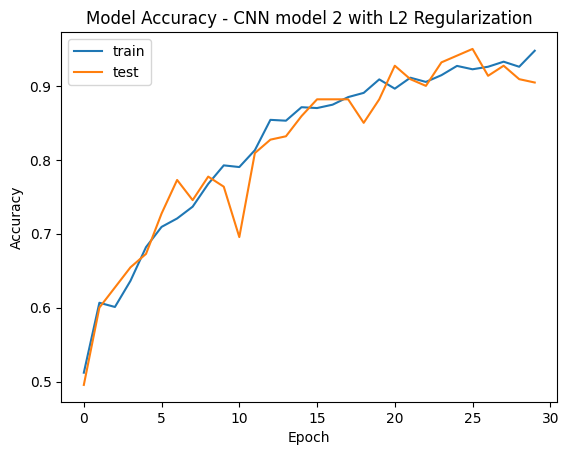

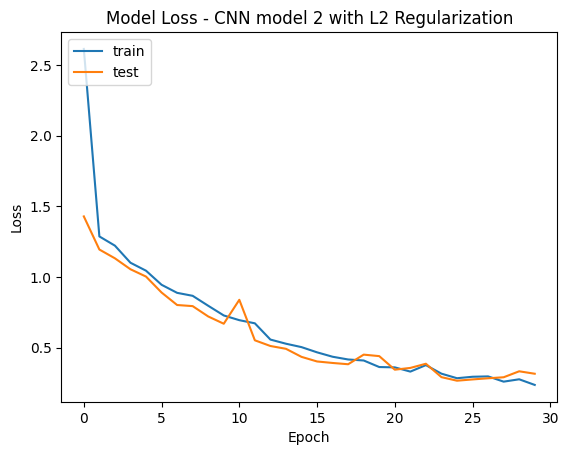

In [82]:
# summarize history for accuracy
plt.plot(Model2.history['accuracy'])
plt.plot(Model2.history['val_accuracy'])
plt.title('Model Accuracy - CNN model 2 with L2 Regularization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model2.history['loss'])
plt.plot(Model2.history['val_loss'])
plt.title('Model Loss - CNN model 2 with L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
CNN2_h5 = tf.keras.models.load_model('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/CNN2_L.h5')

In [97]:
CNN2_h5 = tf.keras.models.load_model('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/CNN2_L_P.h5')

In [99]:
y_pred2 = CNN2_h5.predict(test_generator_aug, batch_size = batch_size)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes2 = test_generator_aug.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step


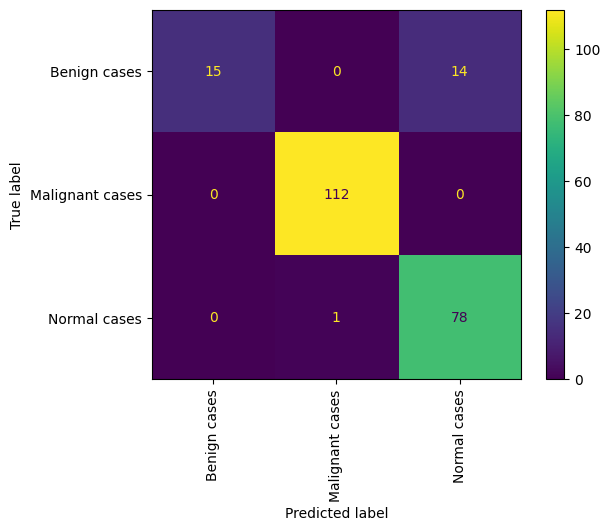

In [100]:
report_labels = ['Benign cases', 'Malignant cases', 'Normal cases']

ConfusionMatrixDisplay.from_predictions(y_true_classes2, y_pred_classes2,
                                        display_labels = report_labels,
                                        xticks_rotation = 90)


# **VGG-16 Model**

In [86]:
train_datagen_vgg = ImageDataGenerator(rescale=1./255,
                                       preprocessing_function=keras.applications.vgg16.preprocess_input,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       brightness_range=[0.75, 1.25],
                                       rotation_range = 15)
test_datagen_vgg = ImageDataGenerator(rescale=1./255,
                                      preprocessing_function=keras.applications.vgg16.preprocess_input)

# generate image data for training set
train_generator_vgg = train_datagen_vgg.flow_from_dataframe(
        lung_train_df,
        x_col = 'paths',
        y_col = 'category',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        seed = 1990,
        shuffle = True)

# generate image data for test set
test_generator_vgg = test_datagen_vgg.flow_from_dataframe(
        lung_test_df,
        x_col = 'paths',
        y_col = 'category',
        target_size=IMAGE_SIZE,
        batch_size=32,
        class_mode='categorical',
        seed = 1990,
        shuffle = True)

Found 877 validated image filenames belonging to 3 classes.
Found 220 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="paths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
output = vgg.layers[-1].output
output = layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False
input_shape = vgg_model.output_shape[1]

In [ ]:
vggmodel = Sequential()
vggmodel.add(vgg_model)
vggmodel.add(layers.Flatten())
vggmodel.add(Dense(512, activation='relu', input_dim=input_shape))
vggmodel.add(Dropout(0.3))
vggmodel.add(Dense(512, activation='relu'))
vggmodel.add(Dropout(0.3))
vggmodel.add(Dense(3, activation='softmax'))
cce = keras.losses.CategoricalCrossentropy()
opt = keras.optimizers.Adam()

vggmodel.compile(optimizer=opt, loss=cce, metrics=['accuracy'])
VGG_model = vggmodel.fit(train_generator_vgg,
verbose = 1,
validation_data = test_generator_vgg,
epochs=10)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 688s 24s/step - accuracy: 0.4563 - loss: 3.1243 - val_accuracy: 0.7591 - val_loss: 0.6542
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 643s 23s/step - accuracy: 0.7030 - loss: 0.7520 - val_accuracy: 0.7455 - val_loss: 0.5438
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 624s 22s/step - accuracy: 0.7609 - loss: 0.5409 - val_accuracy: 0.8136 - val_loss: 0.4133
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 623s 22s/step - accuracy: 0.8103 - loss: 0.4461 - val_accuracy: 0.8455 - val_loss: 0.3954
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 684s 22s/step - accuracy: 0.7987 - loss: 0.4877 - val_accuracy: 0.8591 - val_loss: 0.3418
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 678s 22s/step - accuracy: 0.8467 - loss: 0.3650 - val_accuracy: 0.8591 - val_loss: 0.3716
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 625s 22s/step - accuracy: 0.8517 - loss: 0.3481 - val_accuracy: 0.8500 - val_loss: 0.3208
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 644s 23s/step - accuracy: 0.8582 - loss: 0.3398 - val_accuracy: 0.

In [ ]:
VGG10  = pickle.load(open("/content/drive/MyDrive/Lung_CTscan_Classifier/Models/VGG_10", "rb"))

In [87]:
VGG_model = pickle.load(open("/content/drive/MyDrive/Lung_CTscan_Classifier/Models/vgg_model", "rb"))

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


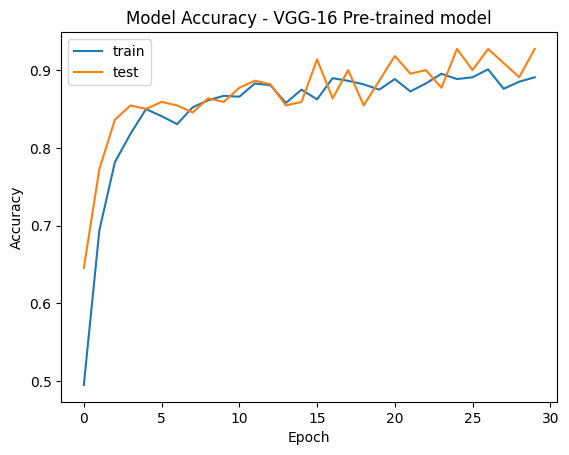

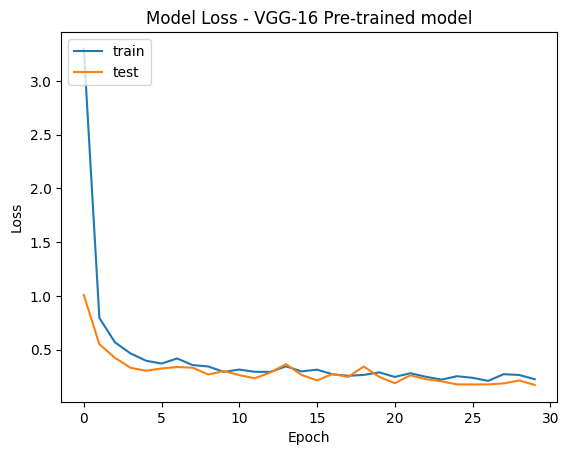

In [88]:
# summarize history for accuracy
plt.plot(VGG_model.history['accuracy'])
plt.plot(VGG_model.history['val_accuracy'])
plt.title('Model Accuracy - VGG-16 Pre-trained model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(VGG_model.history['loss'])
plt.plot(VGG_model.history['val_loss'])
plt.title('Model Loss - VGG-16 Pre-trained model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [108]:
VGG_h5 = tf.keras.models.load_model('/content/drive/MyDrive/Lung_CTscan_Classifier/Models/VGG_model.h5')

In [109]:
y_pred3 = VGG_h5.predict(test_generator_vgg, batch_size = batch_size)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_true_classes3 = test_generator_vgg.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 122s 17s/step


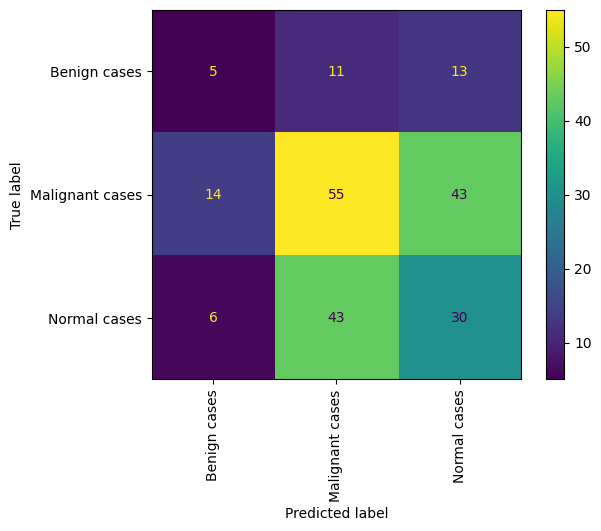

In [110]:
report_labels = ['Benign cases', 'Malignant cases', 'Normal cases']

ConfusionMatrixDisplay.from_predictions(y_true_classes3, y_pred_classes3,
                                        display_labels = report_labels,
                                        xticks_rotation = 90)


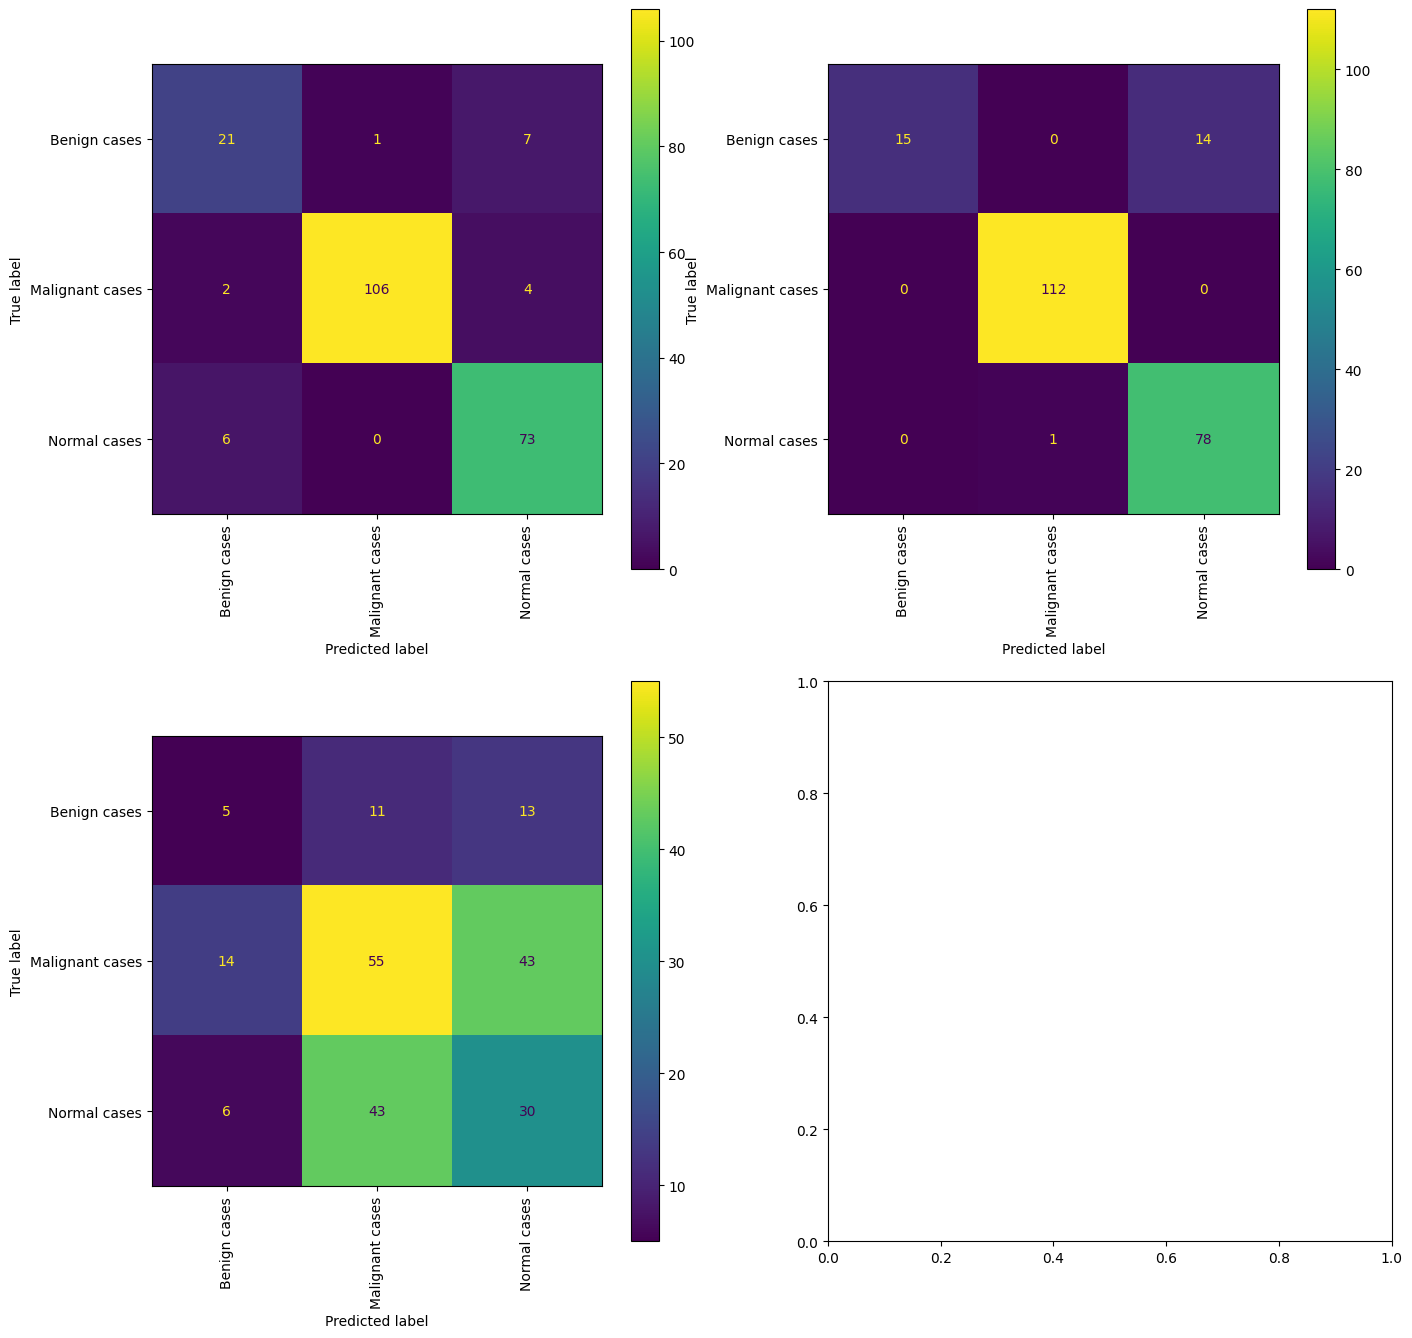

In [111]:
# instantiate figure
fig, axes = plt.subplots(figsize = (16, 16), ncols = 2, nrows = 2)
report_labels = ['Benign cases', 'Malignant cases', 'Normal cases']

# plot confusion matrices for each model
ConfusionMatrixDisplay.from_predictions(y_true_classes1, y_pred_classes1,
                                        display_labels = report_labels,
                                        xticks_rotation = 90,
                                        ax = axes[0, 0])
ConfusionMatrixDisplay.from_predictions(y_true_classes2, y_pred_classes2,
                                        display_labels = report_labels,
                                        xticks_rotation = 90,
                                        ax = axes[0, 1])
ConfusionMatrixDisplay.from_predictions(y_true_classes3, y_pred_classes3,
                                        display_labels = report_labels,
                                        xticks_rotation = 90,
                                        ax = axes[1, 0])

In [112]:
print('CNN Model 1')
print(classification_report(test_generator_aug.classes, y_pred_classes1, target_names = report_labels))
print('--------------------------------------------------------')
print('CNN Model 2')
print(classification_report(test_generator_aug.classes, y_pred_classes2, target_names = report_labels))
print('--------------------------------------------------------')
print('CNN Model 3')
print(classification_report(test_generator_vgg.classes, y_pred_classes3, target_names = report_labels))
print('--------------------------------------------------------')

CNN Model 1
                 precision    recall  f1-score   support

   Benign cases       0.72      0.72      0.72        29
Malignant cases       0.99      0.95      0.97       112
   Normal cases       0.87      0.92      0.90        79

       accuracy                           0.91       220
      macro avg       0.86      0.86      0.86       220
   weighted avg       0.91      0.91      0.91       220

--------------------------------------------------------
CNN Model 2
                 precision    recall  f1-score   support

   Benign cases       1.00      0.52      0.68        29
Malignant cases       0.99      1.00      1.00       112
   Normal cases       0.85      0.99      0.91        79

       accuracy                           0.93       220
      macro avg       0.95      0.83      0.86       220
   weighted avg       0.94      0.93      0.92       220

--------------------------------------------------------
CNN Model 3
                 precision    recall  f1-score